In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import plotly.graph_objs as go
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [2]:
df_hmless= pd.read_csv("Data/homelessness-07to16.csv")

In [3]:
df_hmless.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,1/1/2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,1/1/2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842


In [4]:

df_hmless.tail()

,Year,State,CoC Number,CoC Name,Measures,Count
86524,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Veterans,31
86526,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth (Under 25),3
86527,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Age 18-24,3
86528,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Under 18,0


In [5]:
df_hmless['Count'] = df_hmless['Count'].str.replace(',','').astype(np.int64)
df_hmless["Year"]=pd.to_datetime(df_hmless["Year"])

In [6]:
df_hmless.dtypes

Year          datetime64[ns]
State                 object
CoC Number            object
CoC Name              object
Measures              object
Count                  int64
dtype: object

In [7]:
newdf=df_hmless.copy()
newdf.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,2007-01-01,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,2007-01-01,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,2007-01-01,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,2007-01-01,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,2007-01-01,AK,AK-500,Anchorage CoC,Sheltered Homeless,842


In [8]:
newdf.drop(["CoC Number", "CoC Name"], axis =1)

,Year,State,Measures,Count
0,2007-01-01,AK,Chronically Homeless Individuals,224
1,2007-01-01,AK,Homeless Individuals,696
2,2007-01-01,AK,Homeless People in Families,278
3,2007-01-01,AK,Sheltered Chronically Homeless Individuals,187
4,2007-01-01,AK,Sheltered Homeless,842
...,...,...,...,...
86524,2016-01-01,WY,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,2016-01-01,WY,Unsheltered Homeless Veterans,31
86526,2016-01-01,WY,Unsheltered Parenting Youth (Under 25),3
86527,2016-01-01,WY,Unsheltered Parenting Youth Age 18-24,3


In [9]:
newdf.State.value_counts()

CA    8946
FL    5832
NY    5703
MI    4536
IL    4320
MA    3549
VA    3456
MD    3456
NJ    3414
PA    3408
NC    2592
TX    2376
TN    2160
MN    2160
LA    1944
OH    1944
GA    1764
MO    1728
OK    1728
AL    1728
WA    1512
OR    1512
AR    1425
WV     864
KS     864
WI     864
SC     864
NE     648
AZ     648
MS     648
IA     648
NH     648
NV     648
CO     648
KY     648
UT     648
IN     648
VT     432
ME     432
CT     432
ID     432
HI     432
AK     432
NM     432
PR     432
WY     216
MT     216
SD     216
VI     216
GU     216
DE     216
ND     216
DC     216
RI     216
Name: State, dtype: int64

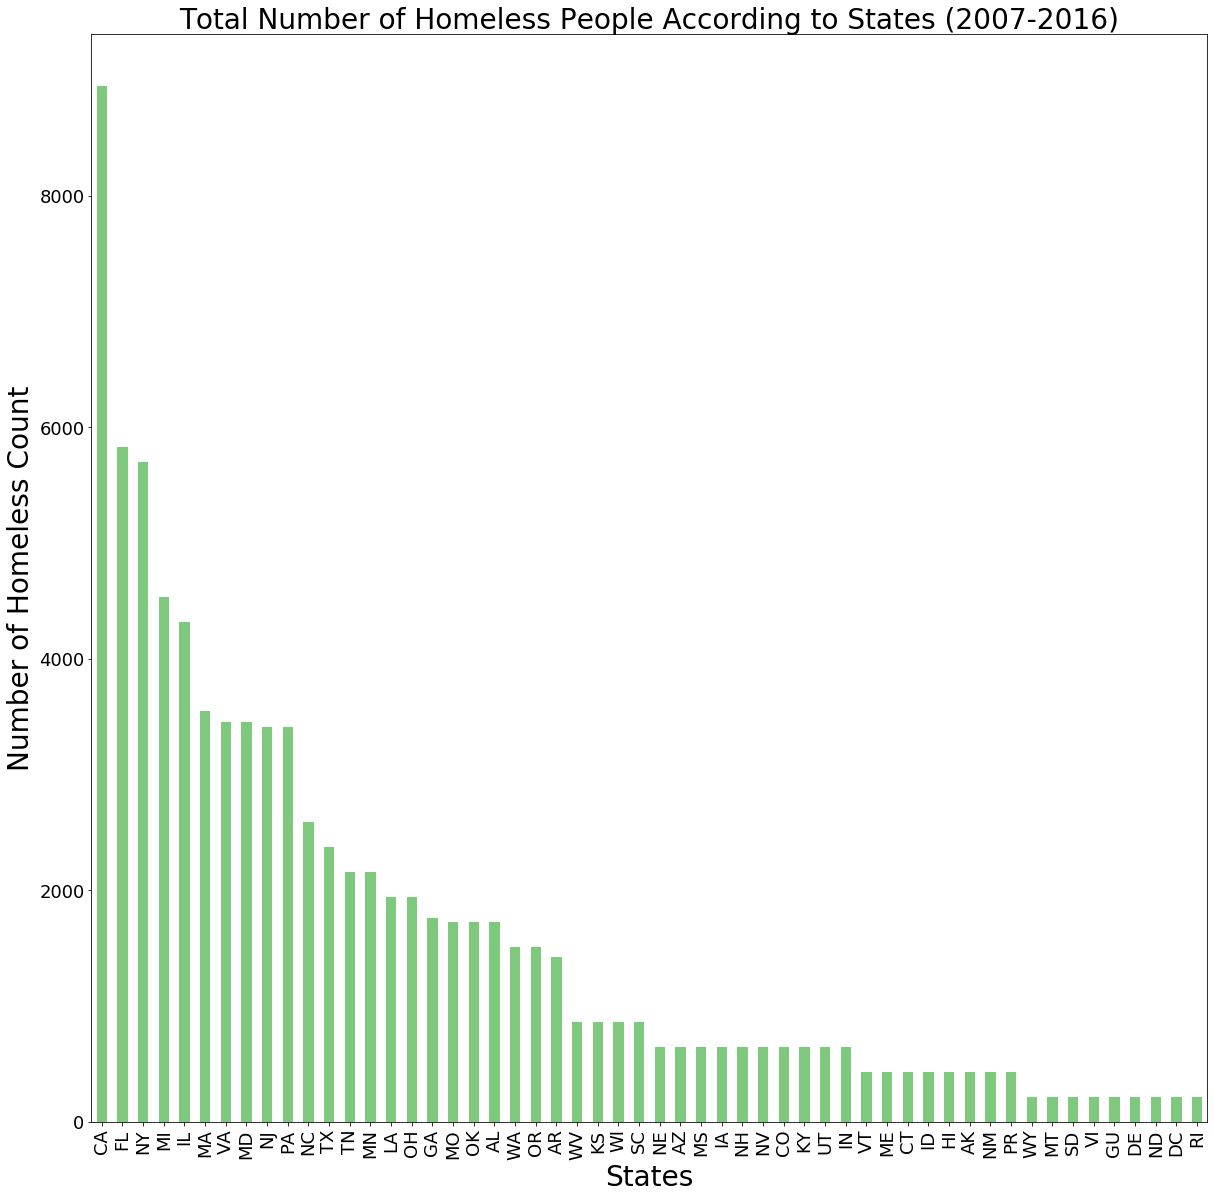

In [10]:
newdf.State.value_counts().plot(kind ="bar", title= "Total number of homeless people according to States (2007-2016)", 
                            figsize=(20,20), colormap="Accent", fontsize =18)
plt.xlabel("States", fontdict ={"fontsize": 28})
plt.ylabel("Number of Homeless Count",fontdict={"fontsize": 28} )
plt.title("Total Number of Homeless People According to States (2007-2016)", fontdict={'fontsize':28})
plt.savefig("Image/Homeless_count.png")
plt.show()

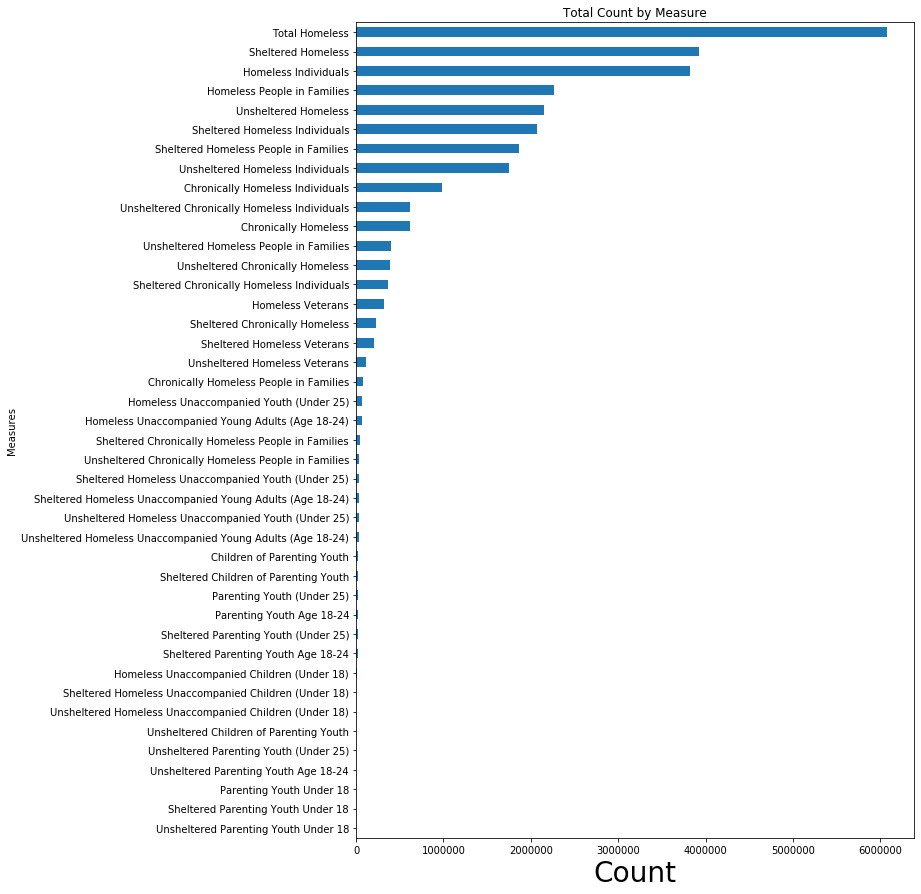

In [33]:
#Total count by mearsure
newdf.groupby("Measures")["Count"].sum().sort_values().plot(kind='barh', title ='Total Count by Measure', figsize =(10,15))
plt.xlabel("Count", fontdict ={"fontsize": 28})
# plt.ylabel("Number of Homeless Count",fontdict={"fontsize": 28} )
# plt.title("Total Number of Homeless People According to States (2007-2016)", fontdict={'fontsize':28})
plt.savefig("Image/Measure_count.png")
plt.show()

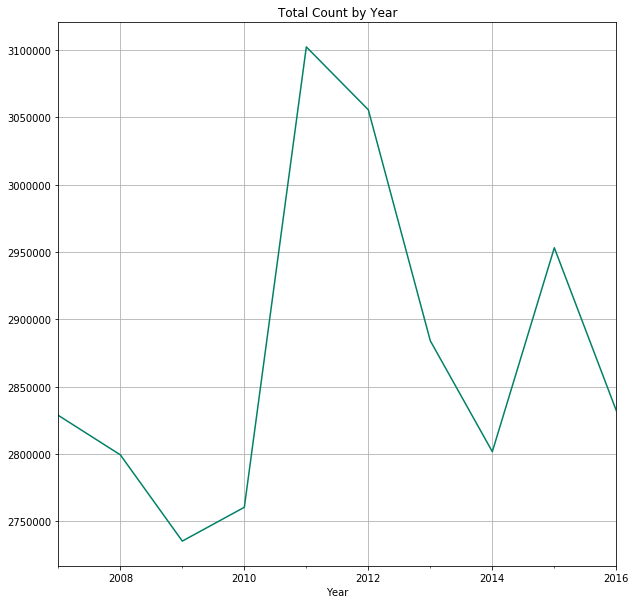

In [36]:
#Total count by year
newdf.groupby("Year")["Count"].sum().plot(y='Count', kind = "line", title ="Total Count by Year", colormap="summer",\
                                         figsize=(10,10))
plt.grid()
plt.savefig("Image/Total_count_by_year.png")
plt.show()

In [11]:
sfh_df = pd.read_csv("Data/sfh_price.csv")
sfh_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,102001,0,United States,Country,NaN,275000.0,274345.0,272863.0,272123.0,272398.0,...,318225.0,314475.0,309475.0,305475.0,301975.0,299738.0,303488.0,308713.0,316438.0,326175.0
1,394913,1,"New York, NY",Msa,NY,500900.0,500450.0,500267.0,500200.0,506225.0,...,568974.0,567499.0,567499.0,569000.0,569000.0,570500.0,577750.0,584250.0,591750.0,598000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,849999.0,849999.0,852999.0,854750.0,862000.0,...,936225.0,939000.0,942725.0,948197.0,959669.0,982169.0,1007194.0,1010972.0,1014750.0,1027000.0
3,394463,3,"Chicago, IL",Msa,IL,324900.0,321400.0,315600.0,312950.0,313975.0,...,345175.0,338675.0,331200.0,324927.0,319725.0,320100.0,327075.0,334600.0,343325.0,350700.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,345000.0,343575.0,344017.0,344763.0,347238.0,...,350373.0,346870.0,345123.0,342998.0,340498.0,339225.0,339700.0,339950.0,343700.0,348724.0


In [12]:
sfh_df["avg_2017"]= (sfh_df["2017-10-31"]+sfh_df["2017-11-30"]+sfh_df["2017-12-31"])/3

In [13]:
sfh_ndf= sfh_df.groupby("StateName", as_index=False).mean()

In [14]:
sfh_price_cleaned = sfh_ndf[["StateName", "avg_2017"]]

sfh_price_renamed=sfh_price_cleaned.rename(columns={
    "StateName": "State",
    "avg_2017": "2017"
})

In [15]:
# hmls_year2017= newdf.loc[(newdf["Year"]=="2007-01-01") & (newdf["Measures"]=="Total Homeless"), :]
# hmls_year2017.head()

,Year,State,CoC Number,CoC Name,Measures,Count
7,2007-01-01,AK,AK-500,Anchorage CoC,Total Homeless,974
19,2007-01-01,AK,AK-501,Alaska Balance of State CoC,Total Homeless,668
31,2007-01-01,AL,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Total Homeless,2104
43,2007-01-01,AL,AL-501,Mobile City & County/Baldwin County CoC,Total Homeless,649
55,2007-01-01,AL,AL-502,Florence/Northwest Alabama CoC,Total Homeless,265


In [16]:
# homeless_df_agg= hmls_year2017.groupby(hmls_year2017["State"], as_index=False).sum()
# homeless_df_agg.head()

,State,Count
0,AK,1642
1,AL,5452
2,AR,3836
3,AZ,14646
4,CA,138986


In [17]:
merged_df = pd.merge(homeless_df_agg, sfh_price_renamed, on= "State", how= "inner")

In [18]:
merged_df.head()

,State,Count,2017
0,AL,5452,213555.000000
1,AR,3836,180400.000000
2,AZ,14646,299368.333333
3,CA,138986,587259.666667
4,CO,14225,449797.533333


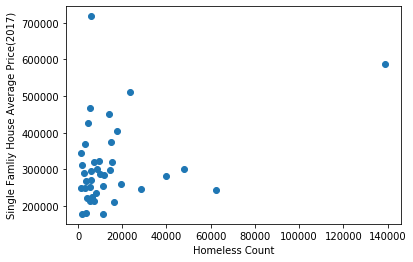

In [19]:
plt.scatter(merged_df["Count"], merged_df["2017"])
plt.xlabel("Homeless Count")
plt.ylabel("Single Famliy House Average Price(2017)")
plt.show()

The correlation between homelessness and the average housing price is 0.33


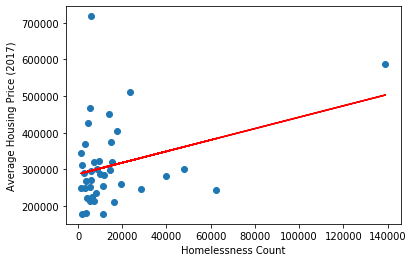

In [31]:
corr=round(st.pearsonr(merged_df['Count'],merged_df['2017'])[0],2)
print(f"The correlation between homelessness and the average housing price is {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_df['Count'],merged_df['2017'])
y_values = merged_df['Count']*slope+intercept
plt.scatter(merged_df['Count'], merged_df['2017'])
plt.plot(merged_df['Count'],y_values,color="red")
plt.xlabel('Homelessness Count')
plt.ylabel('Average Housing Price (2017)')

plt.savefig("Image/correlation.png")
plt.show()

In [21]:
homeless_2017 = pd.read_excel("Data/2017_hmls.xlsx")
homeless_2017.info()                         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 45 columns):
CoC Number                                                           400 non-null object
CoC Name                                                             400 non-null object
State                                                                399 non-null object
Total Homeless, 2017                                                 400 non-null float64
Sheltered Homeless, 2017                                             400 non-null float64
Unsheltered Homeless, 2017                                           400 non-null float64
Homeless Individuals, 2017                                           400 non-null float64
Sheltered Homeless Individuals, 2017                                 400 non-null float64
Unsheltered Homeless Individuals, 2017                               400 non-null float64
Homeless People in Families, 2017                                    400 non-null float6

In [22]:
hmls_2017_group_df= homeless_2017.groupby("State", as_index=False).sum()
hmls_2017_group_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 43 columns):
State                                                                55 non-null object
Total Homeless, 2017                                                 55 non-null float64
Sheltered Homeless, 2017                                             55 non-null float64
Unsheltered Homeless, 2017                                           55 non-null float64
Homeless Individuals, 2017                                           55 non-null float64
Sheltered Homeless Individuals, 2017                                 55 non-null float64
Unsheltered Homeless Individuals, 2017                               55 non-null float64
Homeless People in Families, 2017                                    55 non-null float64
Sheltered Homeless People in Families, 2017                          55 non-null float64
Unsheltered Homeless People in Families, 2017                        55 non-null float64
Chronica

In [23]:
hmls_2017_final_df = hmls_2017_group_df[["State","Total Homeless, 2017" ]]

In [24]:
merged_df1 = pd.merge(hmls_2017_final_df, sfh_price_renamed, on= "State", how= "inner")
merged_df1.head()
merged_df1= merged_df1.rename(columns={
    "Total Homeless, 2017": "Count", 
    "State": "state", 
    "Count": "Count"
})
merged_df1.head()

,state,Count,2017
0,AL,3793.0,213555.000000
1,AR,2467.0,180400.000000
2,AZ,8947.0,299368.333333
3,CA,134278.0,587259.666667
4,CO,10940.0,449797.533333


The correlation between homelessness and the average housing price is 0.33


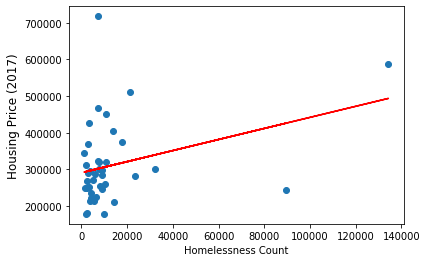

In [37]:
corr=round(st.pearsonr(merged_df1['Count'],merged_df1['2017'])[0],2)
print(f"The correlation between homelessness and the average housing price is {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_df1['Count'],merged_df1['2017'])
y_values = merged_df1['Count']*slope+intercept
plt.scatter(merged_df1['Count'], merged_df1['2017'])
plt.plot(merged_df1['Count'],y_values,color="red")
plt.xlabel('Homelessness Count')
plt.ylabel('Housing Price (2017)', fontdict={"fontsize": 12} )
plt.savefig("Image/cor1.png")
plt.show()

In [26]:
data = dict(type='choropleth',
            colorscale = 'Jet',
            reversescale = True,
            locations = merged_df1['state'],
            z = merged_df1['Count'],
            locationmode = 'USA-states',
            text = merged_df1['state'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':'Total Homelessness Count For U.S.'}
            ) 

layout = dict(title = 'Total Homeless Population Count In 2017 For U.S.',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [27]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)